In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
import graphviz



%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


ImportError: cannot import name 'convert_to_graphviz' from 'sklearn.tree' (C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\__init__.py)

In [2]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
numeric_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

numeric = houses_df[numeric_columns]
numeric

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
numeric = numeric.drop(['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
            'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 
            'PoolArea', 'MiscVal'], axis=1)

In [8]:
numeric = numeric[numeric["SalePrice"] < 700000]
numeric = numeric[numeric["LotArea"] < 100000]

In [10]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = numeric.drop("SalePrice", axis=1)
y = numeric["SalePrice"]

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Si se proporciona un conjunto de datos de prueba adicional, se puede usar como conjunto de validación

# Si no, se puede dividir aún más el conjunto de prueba para tener un conjunto de validación separado
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # División 80/20 entre entrenamiento y validación

# Imprimir los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 872
Tamaño del conjunto de validación: 291
Tamaño del conjunto de prueba: 291


[ 83000. 167500. 222000. 160000.  96500. 208900. 254900. 271000. 252678.
 112500. 144000. 255000. 169000. 140000. 260400. 228500. 196500. 148500.
 115000. 189000. 167900. 193500. 147000. 130500. 187100. 177500. 158000.
 380000. 175000. 501837. 100000. 123000.  80500.  82000. 175500. 158000.
 167500. 144000. 159000. 197500. 137500. 214000. 136905. 164900. 127500.
 215000. 239000. 119000. 179000. 112000. 328000. 207500. 240000. 160200.
 177000. 220000. 158000. 205000. 139000. 139000.  82500. 134900. 325300.
 178000. 185900. 235000. 176000. 152000. 175000. 177000. 236500. 148000.
 193879. 139000. 226700. 315000. 219500. 185000. 124000. 110000. 156000.
 440000. 412500. 120000. 146500. 151500. 179600. 110000. 223500. 250000.
 120000. 124500. 241000. 159500. 110000.  60000. 232000. 130000. 174000.
 383970. 119000. 139000. 229000. 190000. 100000. 184900. 105000. 237000.
 220000. 120000.  79000. 180000. 148000. 133000. 110000. 171900. 285000.
 318000. 392500. 201000. 118000. 134900. 205000. 20

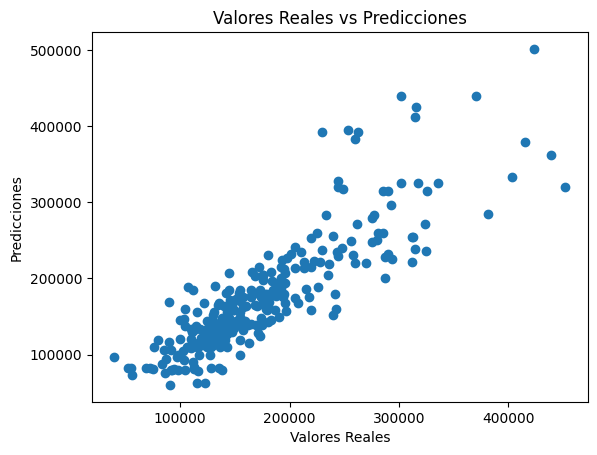

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo
regressor = DecisionTreeRegressor(random_state=0)

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = regressor.predict(X_test)
# Imprimir las predicciones
print(y_pred)
# Gráfico de dispersión de los valores reales frente a las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()